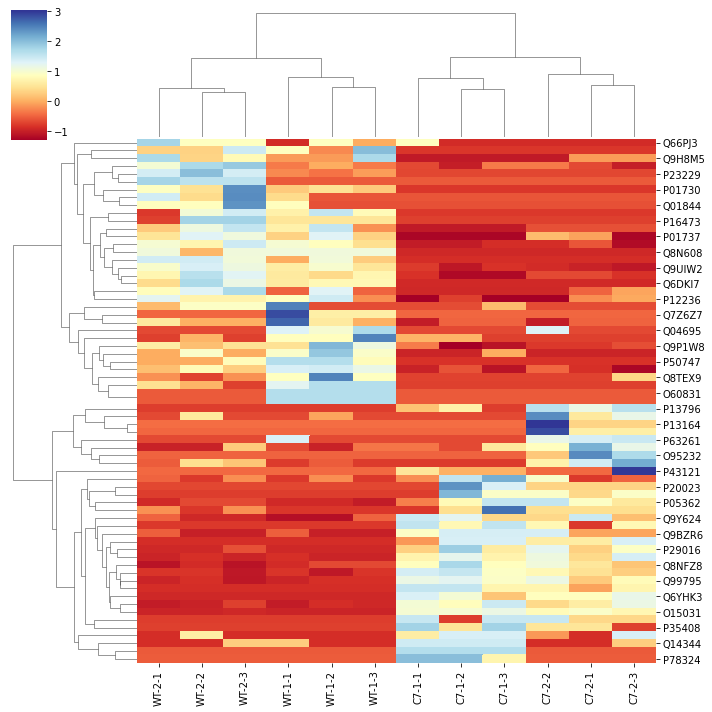

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

df = pd.read_csv("Heat map 3.txt", delimiter ="\t", index_col = 0)

#sns.clustermap(df, standard_scale =0,)
fig = sns.clustermap(df, z_score =0,cmap = "RdYlBu")

fig.savefig("pegah_normalized.png")

In [44]:
df.head(5)

,C7-1-1,C7-1-2,C7-1-3,C7-2-1,C7-2-2,C7-2-3,WT-1-1,WT-1-2,WT-1-3,WT-2-1,WT-2-2,WT-2-3
Q6YHK3,28,24,14,22,22,26,0,0,0,0,0,0
P29016,8,18,10,8,14,12,0,0,0,0,0,2
P29965,40,42,32,25,30,22,4,0,4,4,4,0
Q9Y624,26,24,16,26,16,14,2,2,8,8,4,4
Q99795,46,48,42,30,46,40,8,10,10,8,10,6


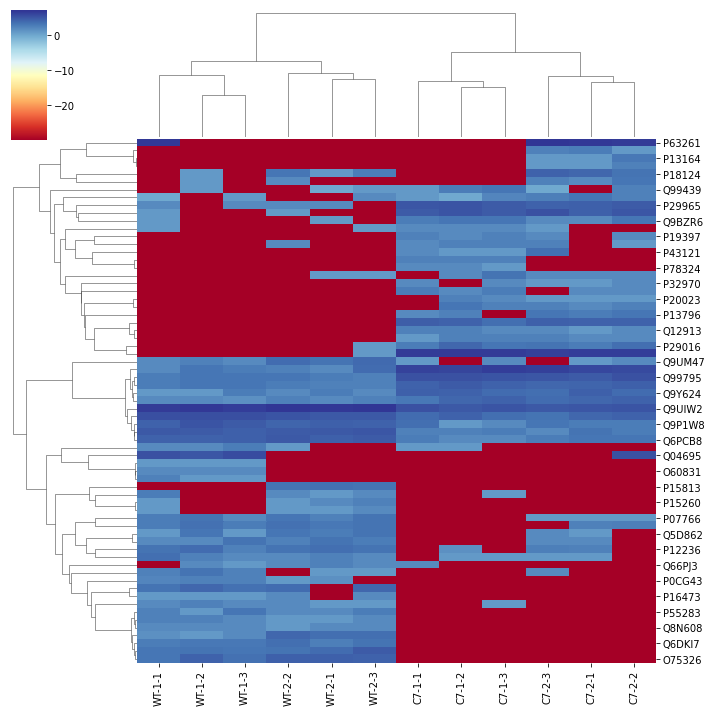

In [95]:
x,y = df.shape

for i in range(x):
  for j in range(y):
    if (df.iloc[i,j] == 0):
      df.iloc[i,j] = 0.000000001


df_loc2 = np.log2(df)
df_loc2.head(5)
sns.clustermap(df_loc2,cmap = "RdYlBu")
#fig.savefig("pegah_log2.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


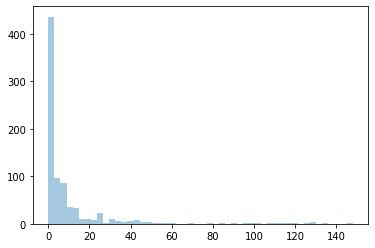

In [127]:
df_norm = df/148
ax = sns.distplot(df, kde = False) 
fig = ax.get_figure()
fig.savefig('pegah_hist.png')


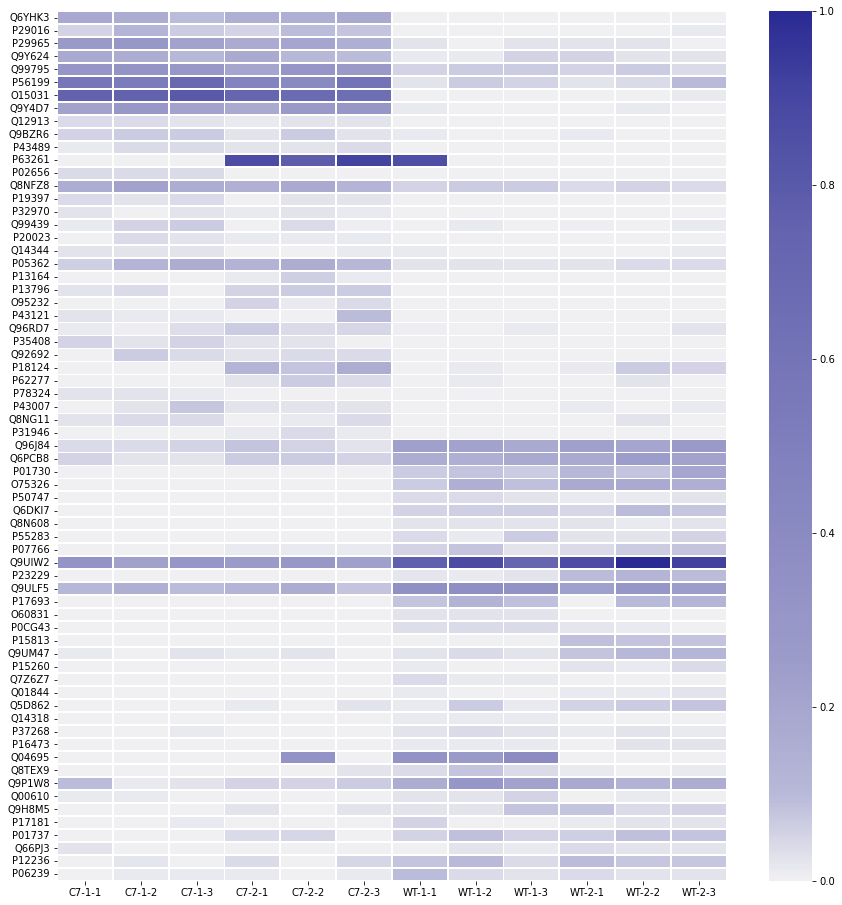

In [129]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

boundaries = [0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]  # custom boundaries

hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
hex_colors = [hex_colors[i] for i in range(0, len(hex_colors), 2)]

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)
plt.figure(figsize = (15,16))

fig = sns.heatmap(
        vmin=0.0,
        vmax=1.0,
        data=df_norm,
        cmap=custom_color_map,
        linewidths=0.75,
  )

fig = ax.get_figure()
fig.savefig('pegah_hist.png')
